In [3]:


from network import R2Plus1DClassifier
import torch
lip_model = R2Plus1DClassifier(num_classes=18, layer_sizes=[3,3,2,2,2])
state_dicts = torch.load("demo40_web_model.pt_puremodel", map_location = torch.device("cuda:0"))
lip_model.load_state_dict(state_dicts)
lip_model.eval()
lip_model.cuda()
1

1

In [26]:
torch.cuda.empty_cache() 
del buffer
del lip_model

In [13]:

buffer  = torch.zeros(1,3,100,48,86).cuda()
%time output =  lip_model(buffer).cpu().detach().numpy()


Wall time: 113 ms


In [14]:
torch.onnx.export(lip_model,               # model being run
                  buffer,                         # model input (or a tuple for multiple inputs)
                  "demo40.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {2 : 'time_step'}})

In [2]:
import onnxruntime
print(onnxruntime.get_device())

GPU


In [15]:
import onnxruntime
import numpy as np
import psutil
so = onnxruntime.SessionOptions()
so.graph_optimization_level = onnxruntime.GraphOptimizationLevel.ORT_ENABLE_ALL
so.optimized_model_filepath = "optimized.onnx"
so.intra_op_num_threads=psutil.cpu_count(logical=True)

ort_session = onnxruntime.InferenceSession("demo40.onnx", so)

buffer = np.zeros((1,3,200,50,100),dtype = "float32")

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: buffer}

# %time torch_out = lip_model(buffer)

# # compare ONNX Runtime and PyTorch results
# np.testing.assert_allclose(to_numpy(torch_out), ort_outs[0], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


In [21]:
buffer = np.random.rand(1,3,90,48,86).astype('float32')
ort_inputs = {ort_session.get_inputs()[0].name:buffer }


In [28]:
%time ort_outs = ort_session.run(None, ort_inputs)

Wall time: 126 ms


In [34]:
ort_session.get_inputs()[0].name: to_numpy(buffer)}

SyntaxError: unmatched '}' (<ipython-input-34-974912626c73>, line 1)

In [21]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
cap = cv2.VideoCapture("2020-10-18_180521_161.avi")

In [23]:
a = []
for i in range(240):
    a.append(cv2.cvtColor(cap.read()[1],cv2.COLOR_BGR2RGB))

In [24]:
!pip install matplotlib

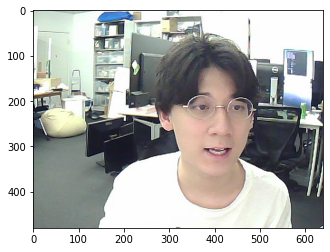

In [29]:
plt.imshow(a[102])

In [34]:
import numpy as np
np.sum(a[102] == a[101])


218609

In [35]:
np.sum(a[102] != a[101])

702991